In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import rubin_sim.maf as maf

In [2]:
runName='twi_neo_repeat3_iz_np1_v2.2'

bundleList = []
plotDict = {}
colmap = maf.batches.ColMapDict("opsimV4")
nside=64
spatial_slicer = maf.slicers.HealpixSlicer
sqls = ['note="twilight_neo"', 'note!="twilight_neo"',
        'note="twilight_neo" and night=10', 'note="twilight_neo" and night=11']
slicer = spatial_slicer(
        nside=nside,
        latCol=colmap["alt"],
        lonCol=colmap["az"],
        latLonDeg=colmap["raDecDeg"],
        useCache=False,
    )
metric = maf.metrics.CountMetric(
    colmap["mjd"], metricName="Nvisits as function of Alt/Az"
)
plotFuncs = [maf.plots.LambertSkyMap()]

plotDict = {"norm": "log"}
for sql in sqls:
    bundle = maf.metricBundles.MetricBundle(
        metric,
        slicer,
        sql,
        plotFuncs=plotFuncs,
        plotDict=plotDict,
        runName=runName
    )
    bundleList.append(bundle)
    
slicer = maf.slicers.HealpixSlicer()
for filtername in 'iz':
    sql='filter="%s" and note="twilight_neo"' % filtername
    metric = maf.metrics.CountMetric('night')
    bundle = maf.metricBundles.MetricBundle(
        metric,
        slicer,
        sql,
        runName=runName
    )
    bundleList.append(bundle)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


In [3]:
bd = maf.metricBundles.makeBundlesDictFromList(bundleList)
g = maf.MetricBundleGroup(bd, 'twi_neo_repeat3_iz_np1_v2.2_10yrs.db', 'temp')


Querying table None with constraint note="twilight_neo" and night=10 for columns ['rotSkyPos', 'altitude', 'azimuth', 'observationStartMJD']
Found 144 visits
Running:  ['twi_neo_repeat3_iz_np1_v2_2_Nvisits_as_function_of_Alt_Az_notetwilight_neo_and_night10_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying table None with constraint note="twilight_neo" and night=11 for columns ['rotSkyPos', 'altitude', 'azimuth', 'observationStartMJD']
Found 139 visits
Running:  ['twi_neo_repeat3_iz_np1_v2_2_Nvisits_as_function_of_Alt_Az_notetwilight_neo_and_night11_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying table None with constraint note="twilight_neo" for columns ['rotSkyPos', 'altitude', 'azimuth', 'observationStartMJD']
Found 338215 visits
Running:  ['twi_neo_repeat3_iz_np1_v2_2_Nvisits_as_function_of_Alt_Az_notetwilight_neo_HEAL']
Completed metric generation.
Running reduce me

0.0 180.0 -180.0 180.0


Plotting complete.
Plotting figures with "filter="z" and note="twilight_neo"" constraint now.
Plotting complete.
Plotting figures with "note!="twilight_neo"" constraint now.


0.0 180.0 -180.0 180.0


Plotting complete.
Plotting figures with "filter="i" and note="twilight_neo"" constraint now.
Plotting complete.


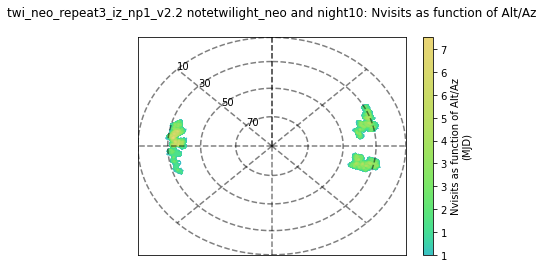

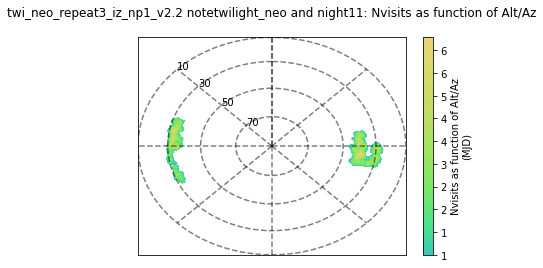

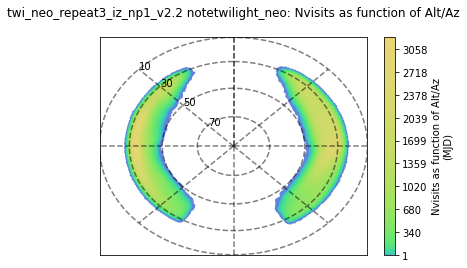

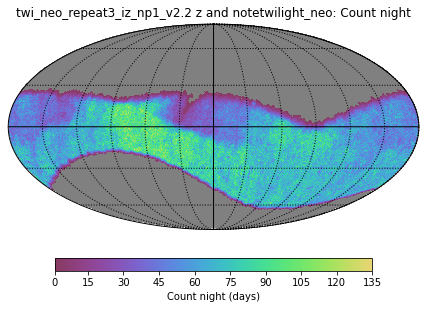

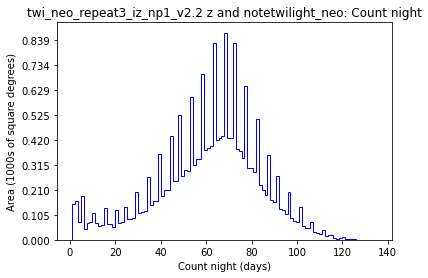

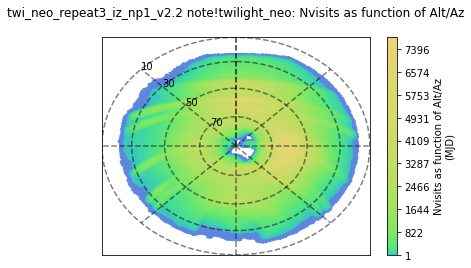

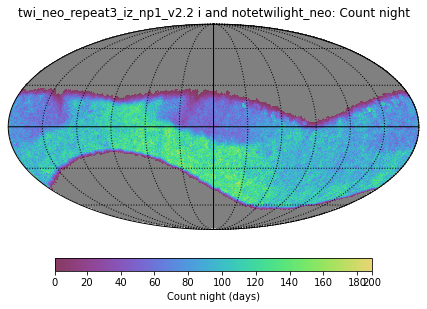

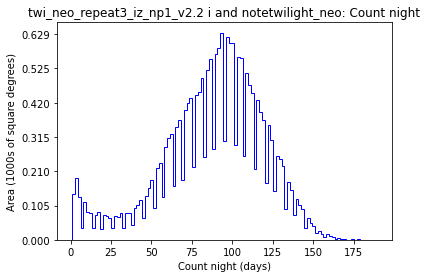

In [4]:
g.runAll()
g.plotAll(closefigs=False)
